In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('drive/', force_remount=True)

Mounted at drive/


In [3]:
os.chdir("/content/drive/MyDrive/HETIC PFA")

In [4]:
data = pd.read_pickle("data_sentiment_dictionary.pkl")

In [5]:
data = pd.DataFrame(data)
data = data.sample(frac=1)

In [6]:
data.head(2)

,raw_images,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise,Label
50,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",12.628,12.103,12.814,31.462,9.514,10.481,6.514,12.484,0
210,"[[[0.4117647, 0.2901961, 0.29411766, 0.2980392...",12.627,12.102,12.811,30.713,9.515,11.978,10.265,11.739,1


In [7]:
data.columns

Index(['raw_images', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Happy',
       'Neutral', 'Sad', 'Surprise', 'Label'],
      dtype='object')

In [8]:
X = data[['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy',
       'Neutral', 'Sad', 'Surprise']]
y = data['Label'].values

In [9]:
y

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, )

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = model_knn.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


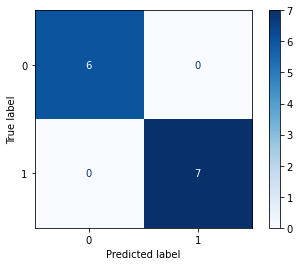

In [14]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model_knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_knn.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.xticks(rotation=0)
plt.show()

In [15]:
data.Label.value_counts()

1    123
0    122
Name: Label, dtype: int64

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([6, 7]))

In [17]:
df = data.drop(columns=['raw_images']).melt(
    id_vars='Label',
    var_name= 'Sentiment',
    value_name='Proba'
)

In [18]:
data.sample(15)

,raw_images,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise,Label
228,"[[[0.32156864, 0.3254902, 0.3372549, 0.3960784...",10.381,7.595,12.805,29.965,9.514,11.983,8.018,10.989,1
130,"[[[0.9882353, 0.9882353, 0.9882353, 0.9882353,...",9.630,12.100,8.304,32.965,12.517,11.983,8.014,9.488,1
30,"[[[0.34117648, 0.28627452, 0.28627452, 0.29019...",8.132,12.099,12.808,32.963,10.264,11.981,11.015,12.487,0
33,"[[[0.6862745, 0.6862745, 0.6862745, 0.6901961,...",9.632,12.100,10.558,30.711,6.515,7.481,12.513,12.489,0
174,"[[[0.49019608, 0.49411765, 0.49803922, 0.50980...",9.630,9.102,9.809,28.462,12.516,10.483,12.512,12.486,1
231,"[[[0.91764706, 0.87058824, 0.93333334, 0.79215...",12.629,7.599,9.813,31.455,12.513,9.732,9.521,12.489,1
131,"[[[0.83137256, 0.827451, 0.827451, 0.8235294, ...",12.630,12.097,12.056,32.966,8.015,11.981,11.019,7.988,1
219,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",12.630,11.351,8.313,28.461,12.511,8.985,11.012,10.987,1
224,"[[[0.85490197, 0.8666667, 0.8666667, 0.8627451...",12.632,12.098,12.802,32.966,12.515,9.733,12.515,12.488,1
83,"[[[0.20392157, 0.2509804, 0.29803923, 0.325490...",8.130,6.099,12.807,32.965,12.519,11.981,12.514,12.484,0


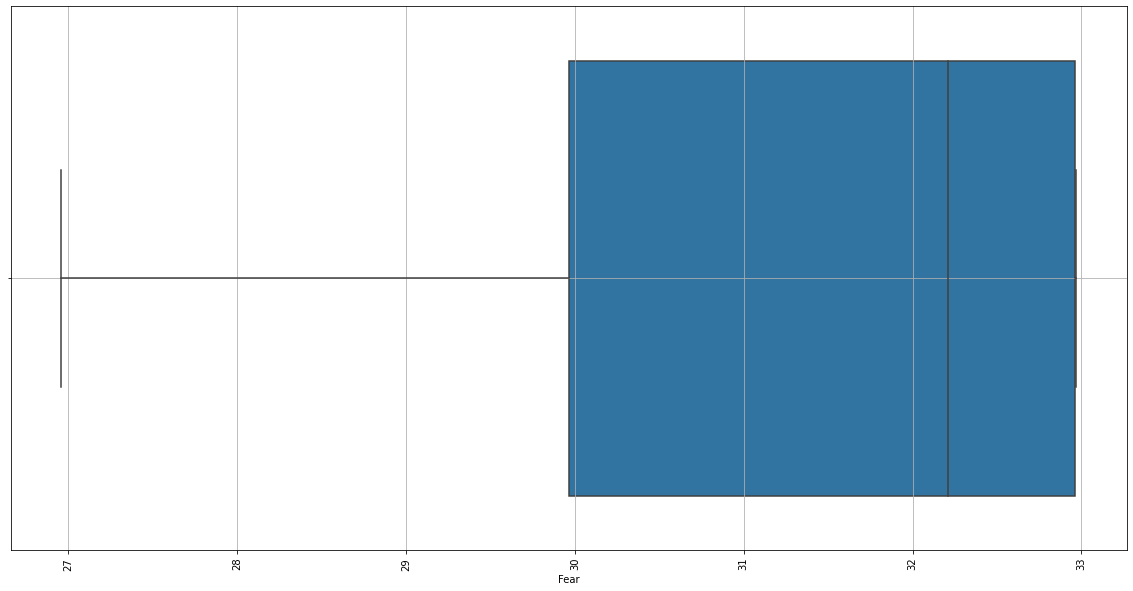

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
#df.boxplot()
plt.figure(figsize=(20,10))
sns.boxplot(x=data["Fear"], hue=data["Label"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [21]:
X_train, y_train = X, y

In [22]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(np.array(X_train), y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
data.columns

Index(['raw_images', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Happy',
       'Neutral', 'Sad', 'Surprise', 'Label'],
      dtype='object')

In [24]:
X_train

,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise
50,12.628,12.103,12.814,31.462,9.514,10.481,6.514,12.484
210,12.627,12.102,12.811,30.713,9.515,11.978,10.265,11.739
104,11.132,12.101,12.805,32.963,12.513,11.234,12.514,9.489
141,10.379,9.850,12.806,31.464,8.013,11.986,12.516,12.487
174,9.630,9.102,9.809,28.462,12.516,10.483,12.512,12.486
...,...,...,...,...,...,...,...,...
32,12.632,11.346,12.054,32.965,12.515,7.476,8.023,12.490
185,9.634,6.098,12.806,32.959,12.515,11.980,12.516,12.490
62,9.632,9.099,12.809,32.212,12.517,11.980,12.515,9.485
142,8.133,12.097,12.803,30.716,12.512,11.984,12.517,12.488


In [25]:
indiv = data[['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy',
       'Neutral', 'Sad', 'Surprise']].iloc[10,:].values

In [26]:
indiv.reshape(1,-1)

array([[ 6.629, 12.101,  6.813, 32.962,  8.018, 11.978, 12.513, 12.486]])

In [27]:
model_knn.kneighbors(indiv.reshape(1,-1), n_neighbors=3)

(array([[0.        , 3.96258855, 4.30772794]]), array([[ 10, 239,  46]]))

In [28]:
voisins_index = model_knn.kneighbors(indiv.reshape(1,-1), n_neighbors=3)[1].tolist()[0]

In [29]:
voisins_index

[10, 239, 46]

In [30]:
data.loc[voisins_index,"raw_images"]

10     [[[0.43529412, 0.43529412, 0.43137255, 0.43137...
239    [[[0.24705882, 0.24705882, 0.27058825, 0.38039...
46     [[[0.5686275, 0.57254905, 0.57254905, 0.568627...
Name: raw_images, dtype: object

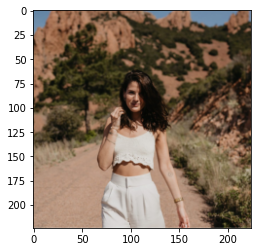

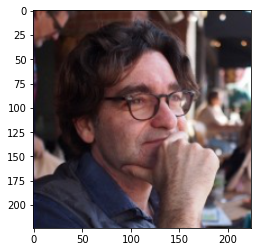

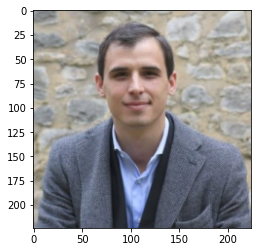

In [31]:
for i in voisins_index:
  plt.imshow(data.loc[i,"raw_images"].transpose(1,2,0))
  plt.show()

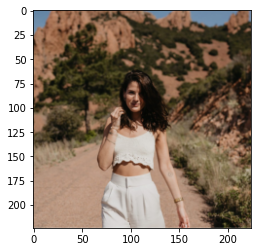

In [32]:
plt.imshow(data.loc[10,"raw_images"].transpose(1,2,0))
plt.show()

In [33]:
os.getcwd()

'/content/drive/MyDrive/HETIC PFA'

In [34]:
ls

data_sentiment_dictionary.pkl  deeplab1.png          flagged/  Raw_Data/
Datasets_images/               DeepLabv3+_model.png  Models/   removed_bg_data/


In [35]:
import pickle
 
# Save the trained model as a pickle string.
#pickle.dump(model_knn, open('Models/knn_model.pkl', 'wb'))

# load model

# pickled_model = pickle.load(open('Models/knn_model.pkl', 'rb'))
# pickled_model.predict(X_test)

In [36]:
ls

data_sentiment_dictionary.pkl  deeplab1.png          flagged/  Raw_Data/
Datasets_images/               DeepLabv3+_model.png  Models/   removed_bg_data/


In [37]:
ls Models

DeepLabv3+.h5                      emotion_model_enhanced-1.pth  knn_model.pkl
emotion_detection_model_state.pth  emotion_model_enhanced.pth
emotion_model_enhanced-1-1.pth     face_attributes_model.pth


In [38]:
data.sample(frac=1)

,raw_images,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise,Label
29,"[[[0.99607843, 0.99607843, 0.99607843, 0.99607...",6.632,6.096,8.302,32.965,11.763,11.232,8.018,12.491,0
52,"[[[0.59607846, 0.59607846, 0.59607846, 0.59215...",12.628,9.851,11.311,32.961,12.514,11.985,9.512,12.488,0
110,"[[[0.78431374, 0.7882353, 0.78431374, 0.811764...",9.630,12.099,12.053,32.968,12.514,5.981,6.517,12.488,0
39,"[[[0.13333334, 0.12941177, 0.12156863, 0.10196...",11.126,10.601,12.811,32.963,6.517,8.984,8.011,11.737,0
215,"[[[0.07450981, 0.07450981, 0.078431375, 0.0823...",12.630,12.100,12.804,32.964,12.516,10.484,9.513,12.488,1
...,...,...,...,...,...,...,...,...,...,...
69,"[[[0.0, 0.23137255, 0.7294118, 0.90588236, 0.9...",8.129,12.098,12.805,32.966,8.016,10.482,12.515,10.989,0
87,"[[[0.92941177, 0.91764706, 0.9254902, 0.925490...",12.628,12.106,10.558,28.462,11.016,11.981,12.515,12.484,0
187,"[[[0.0, 0.019607844, 0.007843138, 0.019607844,...",8.128,9.096,12.806,32.967,12.515,9.730,6.519,12.489,1
37,"[[[0.003921569, 0.003921569, 0.003921569, 0.00...",12.624,12.100,12.825,26.959,10.263,11.986,6.510,12.483,0
